In [2]:
from pynq import PL
PL.reset() #important fixes caching issues which have popped up.
import xrfdc #poorly documented library that handles interfacing to the RF data converter
from pynq import Overlay  #import the overlay module
ol = Overlay('./design_1.bit')  #locate/point to the bit file
import pprint
pprint.pprint(ol.ip_dict)
#dma_interfaces = [ol.axi_dma_0, ol.axi_dma_1, ol.axi_dma_2, ol.axi_dma_3] # 0 is ADC_D, 1 is ADC_C, 2 is ADC_B, 3 is ADC_A
dma_interface = ol.axi_dma_0
rf = ol.usp_rf_data_converter_0

{'axi_dma_0': {'addr_range': 65536,
               'bdtype': None,
               'device': <pynq.pl_server.embedded_device.EmbeddedDevice object at 0xffff8826c520>,
               'driver': <class 'pynq.lib.dma.DMA'>,
               'fullpath': 'axi_dma_0',
               'gpio': {},
               'interrupts': {},
               'mem_id': 'S_AXI_LITE',
               'memtype': 'REGISTER',
               'parameters': {'ADDR_WIDTH': '10',
                              'ARUSER_WIDTH': '0',
                              'AWUSER_WIDTH': '0',
                              'BUSER_WIDTH': '0',
                              'CLK_DOMAIN': 'design_1_zynq_ultra_ps_e_0_0_pl_clk0',
                              'C_BASEADDR': '0xA0000000',
                              'C_DLYTMR_RESOLUTION': '125',
                              'C_ENABLE_MULTI_CHANNEL': '0',
                              'C_FAMILY': 'zynquplus',
                              'C_HIGHADDR': '0xA000FFFF',
                          

                                                       'SGIntErr': {'access': 'read-only',
                                                                    'bit_offset': 8,
                                                                    'bit_width': 1,
                                                                    'description': 'Scatter '
                                                                                   'Gather '
                                                                                   'Internal '
                                                                                   'Error. '
                                                                                   'This '
                                                                                   'error '
                                                                                   'occurs '
                                                                                   'if '


                                            'DAC_TDD_RTS20': '0',
                                            'DAC_TDD_RTS21': '0',
                                            'DAC_TDD_RTS22': '0',
                                            'DAC_TDD_RTS23': '0',
                                            'DAC_TDD_RTS30': '0',
                                            'DAC_TDD_RTS31': '0',
                                            'DAC_TDD_RTS32': '0',
                                            'DAC_TDD_RTS33': '0',
                                            'DAC_VOP_Mode': '1',
                                            'DAC_VOP_RTS': 'false',
                                            'DATA_WIDTH': '32',
                                            'EDK_IPTYPE': 'PERIPHERAL',
                                            'FREQ_HZ': '99999985',
                                            'HAS_BRESP': '1',
                                            'HAS_BURST': '0',
            

                                      'PSU__SD1__GRP_CD__IO': '<Select>',
                                      'PSU__SD1__GRP_POW__ENABLE': '0',
                                      'PSU__SD1__GRP_POW__IO': '<Select>',
                                      'PSU__SD1__GRP_WP__ENABLE': '0',
                                      'PSU__SD1__GRP_WP__IO': '<Select>',
                                      'PSU__SD1__PERIPHERAL__ENABLE': '0',
                                      'PSU__SD1__PERIPHERAL__IO': '<Select>',
                                      'PSU__SD1__RESET__ENABLE': '0',
                                      'PSU__SD1__SLOT_TYPE': '<Select>',
                                      'PSU__SPI0_LOOP_SPI1__ENABLE': '0',
                                      'PSU__SPI0__GRP_SS0__ENABLE': '1',
                                      'PSU__SPI0__GRP_SS0__IO': 'MIO 3',
                                      'PSU__SPI0__GRP_SS1__ENABLE': '1',
                                      'PSU__S

Hardware execution time:  0.0013301372528076172


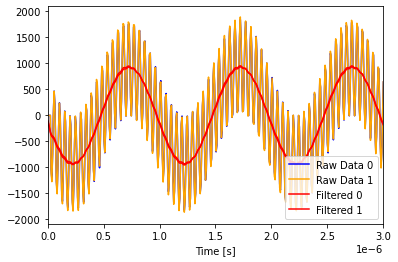

In [3]:
import time
import numpy as np
from pynq import allocate
import matplotlib.pyplot as plt
from scipy import signal

# Sampling frequency
fs = 147.456e6
# Number of samples
n = 65536
T = n/fs

"""
def plot_fft(samples,in_signal,n_samples):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Frequency')
    plt.grid()
    plt.plot(samples[:n_samples] - fs/2,in_signal[:n_samples],'y-',label='Signal')
    #plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-',label='Signal')
    plt.legend()
"""

ns = np.linspace(0, fs, n, endpoint = False)

out_buffer = allocate(400024 * 4, dtype=np.int32)
# Trigger the DMA transfer and wait for the result
start_time = time.time()
dma_interface.recvchannel.transfer(out_buffer)
dma_interface.recvchannel.wait()
stop_time = time.time()
hw_exec_time = stop_time-start_time
print('Hardware execution time: ',hw_exec_time)

out_buffer0 = []
out_buffer1 = []
out_buffer2 = []
out_buffer3 = []
for i in range(0, len(out_buffer), 4):
    out_buffer0.append(out_buffer[i])
    out_buffer1.append(out_buffer[i + 1])
    out_buffer2.append(out_buffer[i + 2])
    out_buffer3.append(out_buffer[i + 3])

real0 = []
imag0 = []
#extract the two values (I and Q) from each 32 bit write from the hardware side.
for i in range(65536):
    val = out_buffer0[i]&0xFFFF
    if val >= 32768:
        real0.append(np.int32(0xFFFF0000|val))
    else:
        real0.append(val)
    imag0.append((out_buffer0[i]>>16))

real1 = []
imag1 = []
#extract the two values (I and Q) from each 32 bit write from the hardware side.
for i in range(65536):
    val = out_buffer1[i]&0xFFFF
    if val >= 32768:
        real1.append(np.int32(0xFFFF0000|val))
    else:
        real1.append(val)
    imag1.append((out_buffer1[i]>>16))
    
real2 = []
imag2 = []
#extract the two values (I and Q) from each 32 bit write from the hardware side.
for i in range(65536):
    val = out_buffer2[i]&0xFFFF
    if val >= 32768:
        real2.append(np.int32(0xFFFF0000|val))
    else:
        real2.append(val)
    imag2.append((out_buffer2[i]>>16))
    
real3 = []
imag3 = []
#extract the two values (I and Q) from each 32 bit write from the hardware side.
for i in range(65536):
    val = out_buffer3[i]&0xFFFF
    if val >= 32768:
        real3.append(np.int32(0xFFFF0000|val))
    else:
        real3.append(val)
    imag3.append((out_buffer3[i]>>16))
    
#c_data = np.array(real) + 1j*np.array(imag)
#z = np.fft.fftshift(np.fft.fft(c_data,n))
#plot_fft(ns,abs(z),65535)

plt.xlim(0, 3e-6)
plt.xlabel("Time [s]")
plt.plot(np.linspace(0, T, n), np.array(real0), color = "blue", label = "Raw Data 0")
plt.plot(np.linspace(0, T, n), np.array(real1), color = "orange", label = "Raw Data 1")

fir_filter = signal.firwin(15, [1e6 - 5e3, 1e6 + 5e3], fs = fs, pass_zero = False)
real0_filtered = signal.convolve(np.array(real0), fir_filter, mode = "same")
real1_filtered = signal.convolve(np.array(real1), fir_filter, mode = "same")

plt.plot(np.linspace(0, T, n), real0_filtered, color = "red", label = "Filtered 0")
plt.plot(np.linspace(0, T, n), real1_filtered, color = "red", label = "Filtered 1")

plt.legend()

out_buffer.close()